## Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

The company in the last campaign contacted the customers at random without looking at the available information. However, this time company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being, and wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company has to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

## Objective

To predict which customer is more likely to purchase the newly introduced travel package.

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
#Loading the dataset - sheet_name parameter is used if there are Basicple tabs in the excel file.
data=pd.read_excel("Downloads/Tourism.xlsx",sheet_name='Tourism')

In [3]:
data.head(5) 

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [5]:
pd.DataFrame(data={'% of Missing Values':round(data.isna().sum()/data.isna().count()*100,2)})

,% of Missing Values
CustomerID,0.00
ProdTaken,0.00
Age,4.62
TypeofContact,0.51
CityTier,0.00
DurationOfPitch,5.14
Occupation,0.00
Gender,0.00
NumberOfPersonVisiting,0.00
NumberOfFollowups,0.92


In [6]:
data.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

In [7]:
#Dropping CustomerID column
data.drop(columns='CustomerID',inplace=True)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0


1. **ProdTaken**: Binary feature (0 or 1) with mean 0.188, indicating a low proportion of positive cases.
2. **Age**: Average age is 37.62, with a standard deviation of 9.13, ranging from 18 to 61.
3. **CityTier**: Most values are either 1, 2, or 3, with a mean around 1.65, suggesting a tier distribution.
4. **DurationOfPitch**: Average duration is 15.49 with a high variability (std = 8.51), ranging from 5 to 127.
5. **NumberOfPersonVisiting**: Mean of approximately 2.9, with values between 1 and 5.
6. **MonthlyIncome**: Shows considerable variability with a mean of 23,619 and a maximum of 98,678.


In [9]:
#Making a list of all catrgorical variables 
cat_col=['TypeofContact', 'CityTier','Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation']

#Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print('-'*50)

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64
--------------------------------------------------
CityTier
1    3190
3    1500
2     198
Name: count, dtype: int64
--------------------------------------------------
Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64
--------------------------------------------------
Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64
--------------------------------------------------
NumberOfPersonVisiting
3    2402
2    1418
4    1026
1      39
5       3
Name: count, dtype: int64
--------------------------------------------------
NumberOfFollowups
4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: count, dtype: int64
--------------------------------------------------
ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             

In [10]:
#Replacing 'Fe Male' with 'Female'
data.Gender=data.Gender.replace('Fe Male', 'Female')

In [11]:
#Converting the data type of each categorical variable to 'category'
for column in cat_col:
    data[column]=data[column].astype('category')

In [12]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   category
 8   NumberOfFollowups         4843 non-null   category
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   category
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

## Exploratory Data Analysis (EDA) 

In [13]:
def histogram_boxplot(data, feature, figsize=(10, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )   

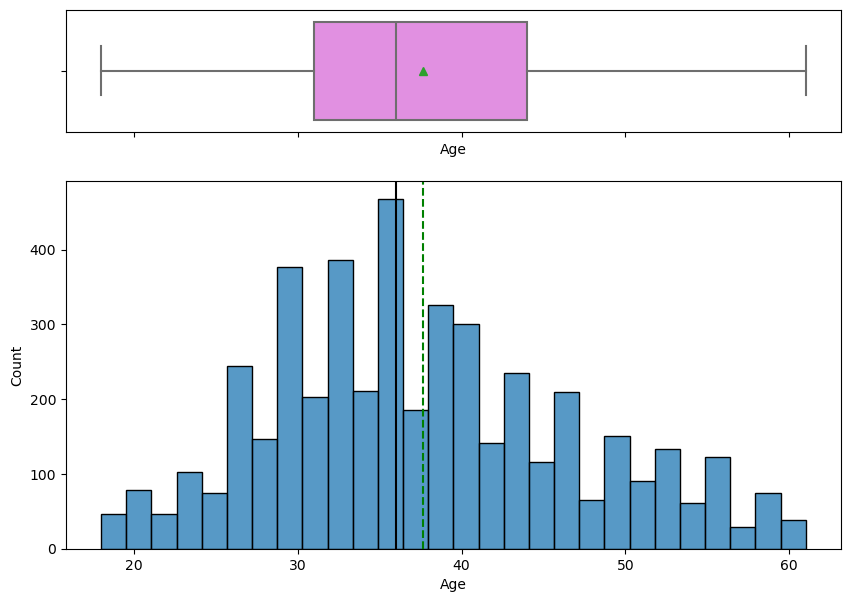

In [14]:
histogram_boxplot(data, "Age")

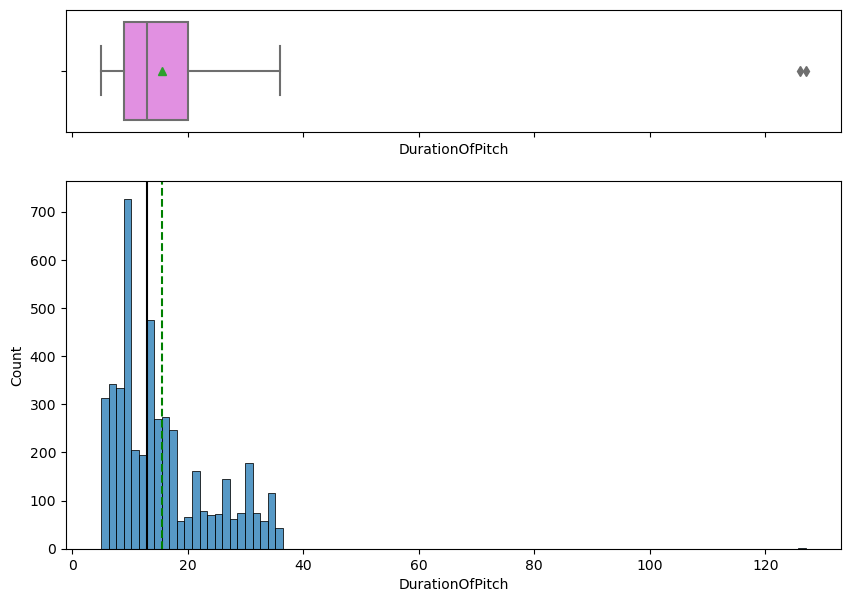

In [15]:
histogram_boxplot(data, 'DurationOfPitch')

In [16]:
data[data['DurationOfPitch']>40]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1434,0,NaN,Company Invited,3,126.0,Salaried,Male,2,3.0,Basic,3.0,Married,3.0,0,1,1,1.0,Executive,18482.0
3878,0,53.0,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0


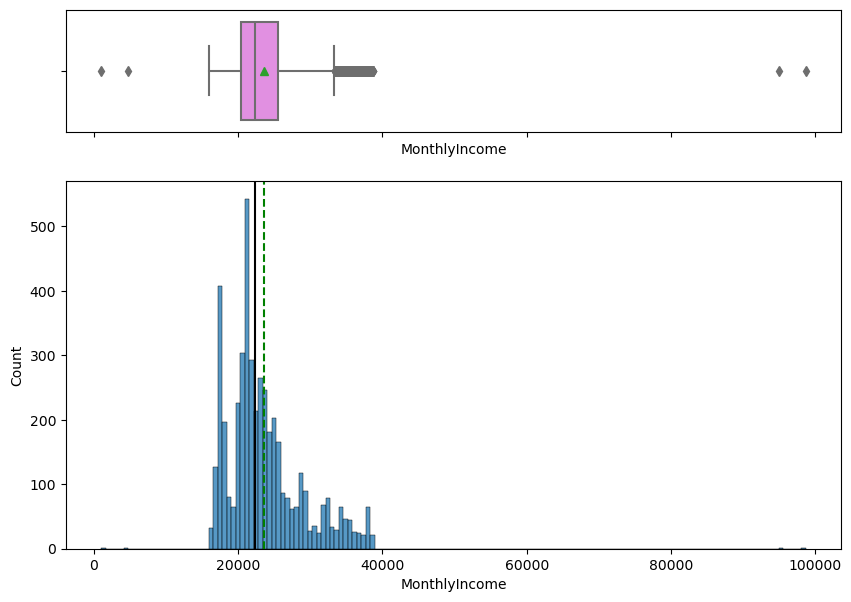

In [17]:
histogram_boxplot(data, 'MonthlyIncome')

In [18]:
data[(data.MonthlyIncome>40000) | (data.MonthlyIncome<12000)]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
38,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,NaN,Divorced,1.0,1,2,1,0.0,Executive,95000.0
142,0,38.0,Self Enquiry,1,9.0,Large Business,Female,2,3.0,Deluxe,3.0,Single,4.0,1,5,0,0.0,Manager,1000.0
2482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0
2586,0,39.0,Self Enquiry,1,10.0,Large Business,Female,3,4.0,Deluxe,3.0,Single,5.0,1,5,0,1.0,Manager,4678.0


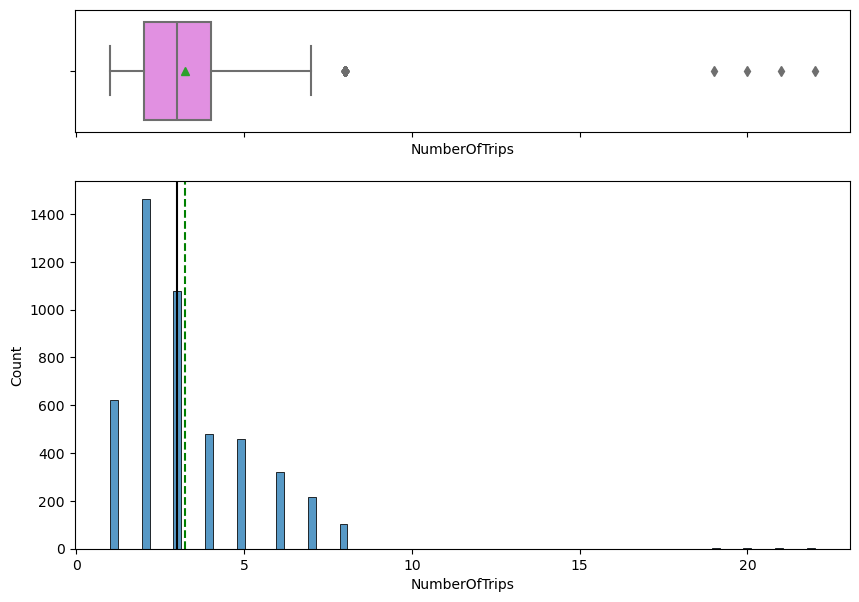

In [19]:
histogram_boxplot(data,'NumberOfTrips')

In [20]:
data.NumberOfTrips.value_counts(normalize=True)

NumberOfTrips
2.0     0.308340
3.0     0.227254
1.0     0.130581
4.0     0.100674
5.0     0.096462
6.0     0.067818
7.0     0.045914
8.0     0.022115
19.0    0.000211
21.0    0.000211
20.0    0.000211
22.0    0.000211
Name: proportion, dtype: float64

 **Most Common Values**: 
   - `NumberOfTrips` values of 2, 3, and 1 are the most common, representing around 30.8%, 22.7%, and 13.1% of the data, respectively. This suggests that most individuals tend to take a low to moderate number of trips.
   
- **Less Common Values**: 
   - Higher values of `NumberOfTrips`, such as 19, 21, and 22, have very low proportions (0.0211% each), indicating that very few individuals take a high number of trips.

This distribution highlights a heavily skewed nature, with most observations concentrated in the lower range of `NumberOfTrips`. This kind of skew might impact any statistical or predictive models if `NumberOfTrips` is an important predictor, as the model might struggle with rare high values. 

Would you like further analysis or visualizations on this feature or its relationship with other variables?

### Removing outliers form duration of pitch, monthly income, and number of trips.

In [21]:
#Dropping observaions with duration of pitch greater than 40. There are just 2 such observations
data.drop(index=data[data.DurationOfPitch>37].index,inplace=True)

#Dropping observation with monthly income less than 12000 or greater than 40000. There are just 4 such observations
data.drop(index=data[(data.MonthlyIncome>40000) | (data.MonthlyIncome<12000)].index,inplace=True)

#Dropping observations with number of trips greater than 8. There are just 4 such observations
data.drop(index=data[data.NumberOfTrips>10].index,inplace=True)

In [22]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

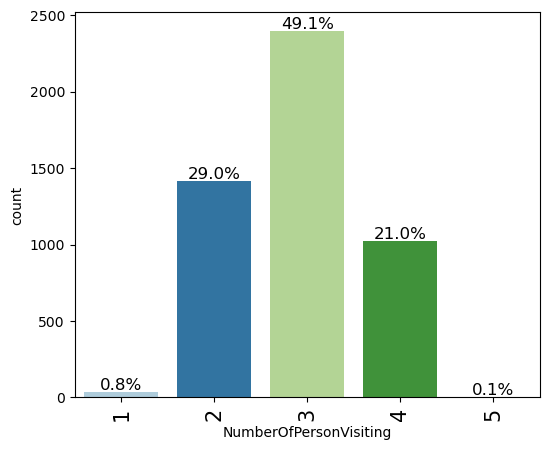

In [23]:
labeled_barplot(data, "NumberOfPersonVisiting", perc=True)

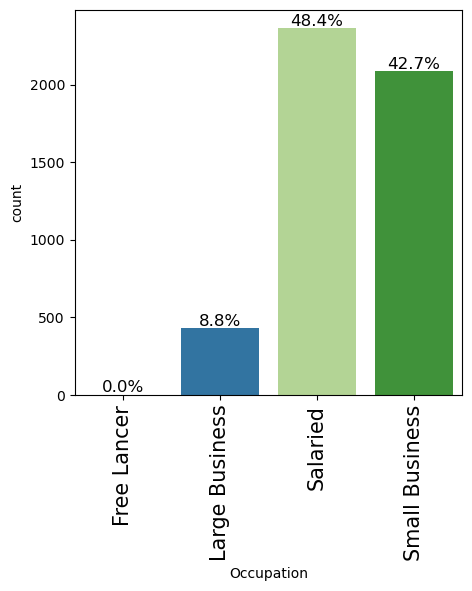

In [24]:
labeled_barplot(data, "Occupation", perc=True)

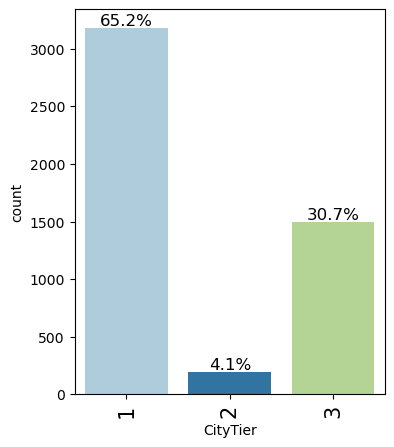

In [25]:
labeled_barplot(data, "CityTier", perc=True)

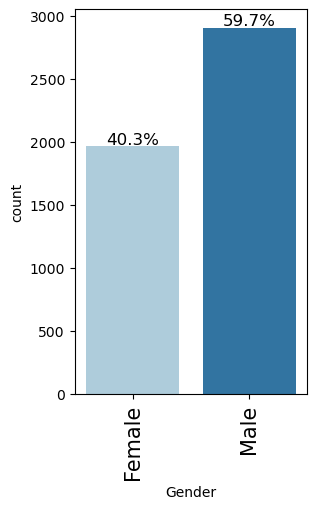

In [26]:
labeled_barplot(data, "Gender", perc=True)

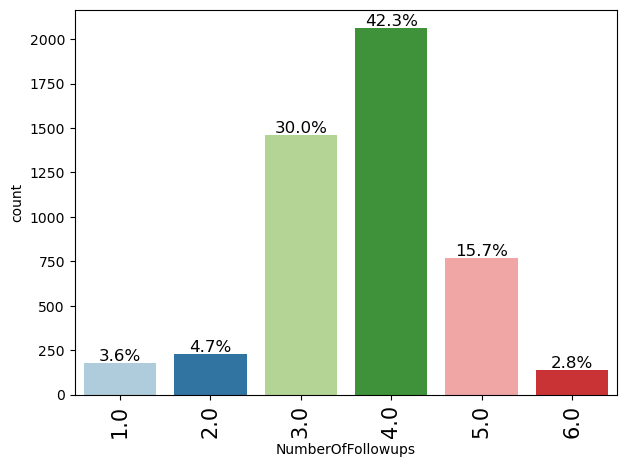

In [27]:
labeled_barplot(data, "NumberOfFollowups", perc=True)

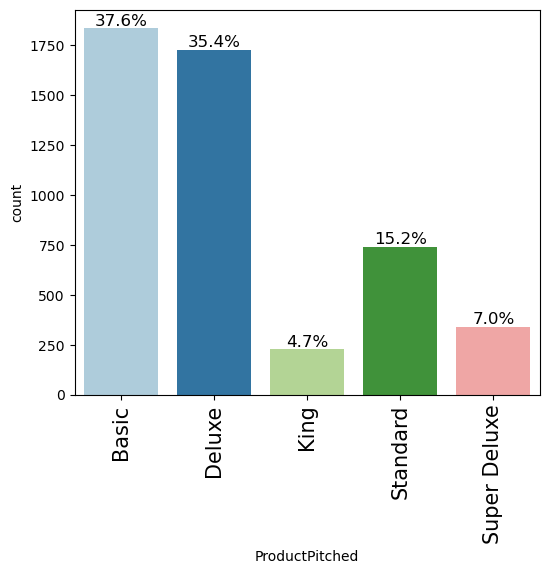

In [28]:
labeled_barplot(data, "ProductPitched", perc=True)

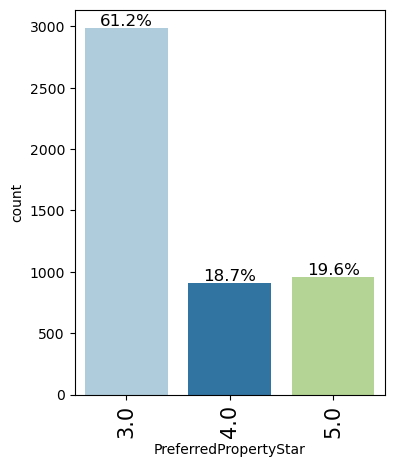

In [29]:
labeled_barplot(data, "PreferredPropertyStar", perc=True)

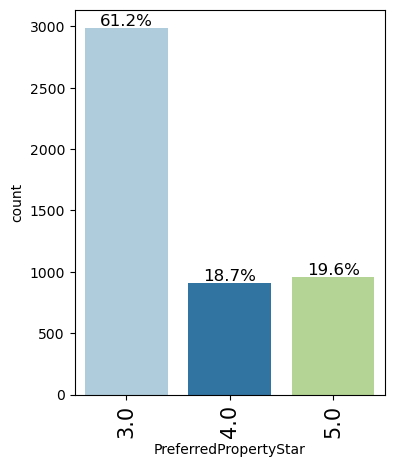

In [30]:
labeled_barplot(data, "PreferredPropertyStar", perc=True)

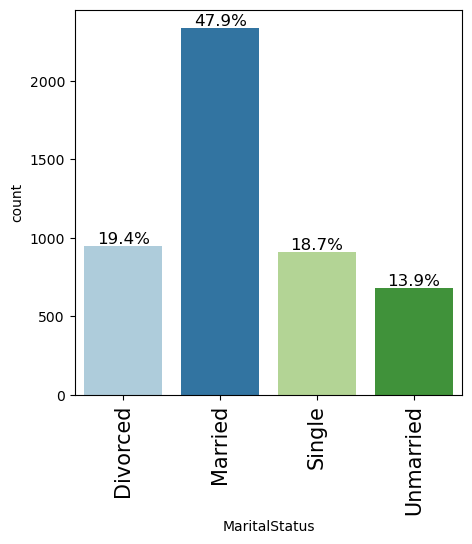

In [31]:
labeled_barplot(data, "MaritalStatus", perc=True)

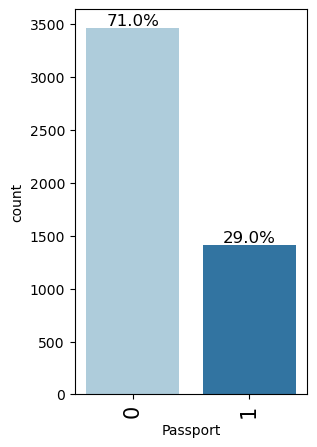

In [32]:
labeled_barplot(data, "Passport", perc=True)

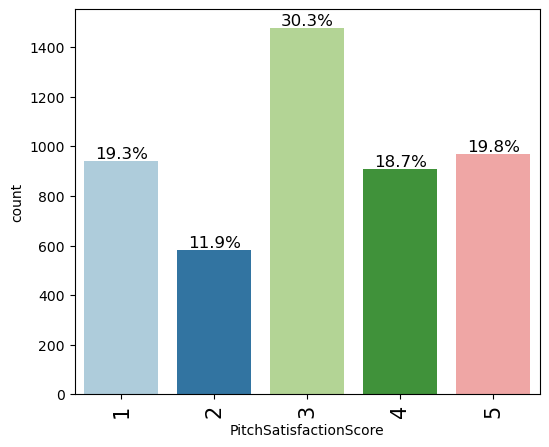

In [33]:
labeled_barplot(data, "PitchSatisfactionScore", perc=True)

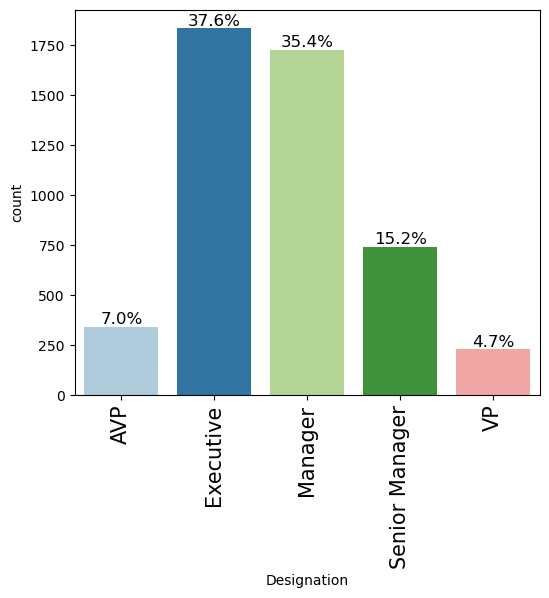

In [34]:
labeled_barplot(data, "Designation", perc=True)

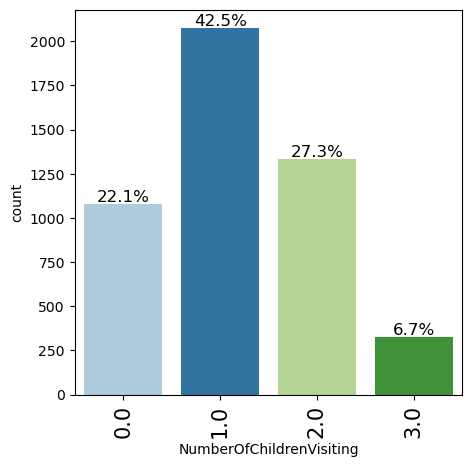

In [35]:
labeled_barplot(data, "NumberOfChildrenVisiting", perc=True)

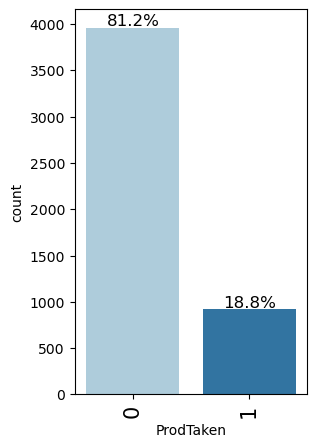

In [36]:
labeled_barplot(data, "ProdTaken", perc=True)

### Bivariate Analysis

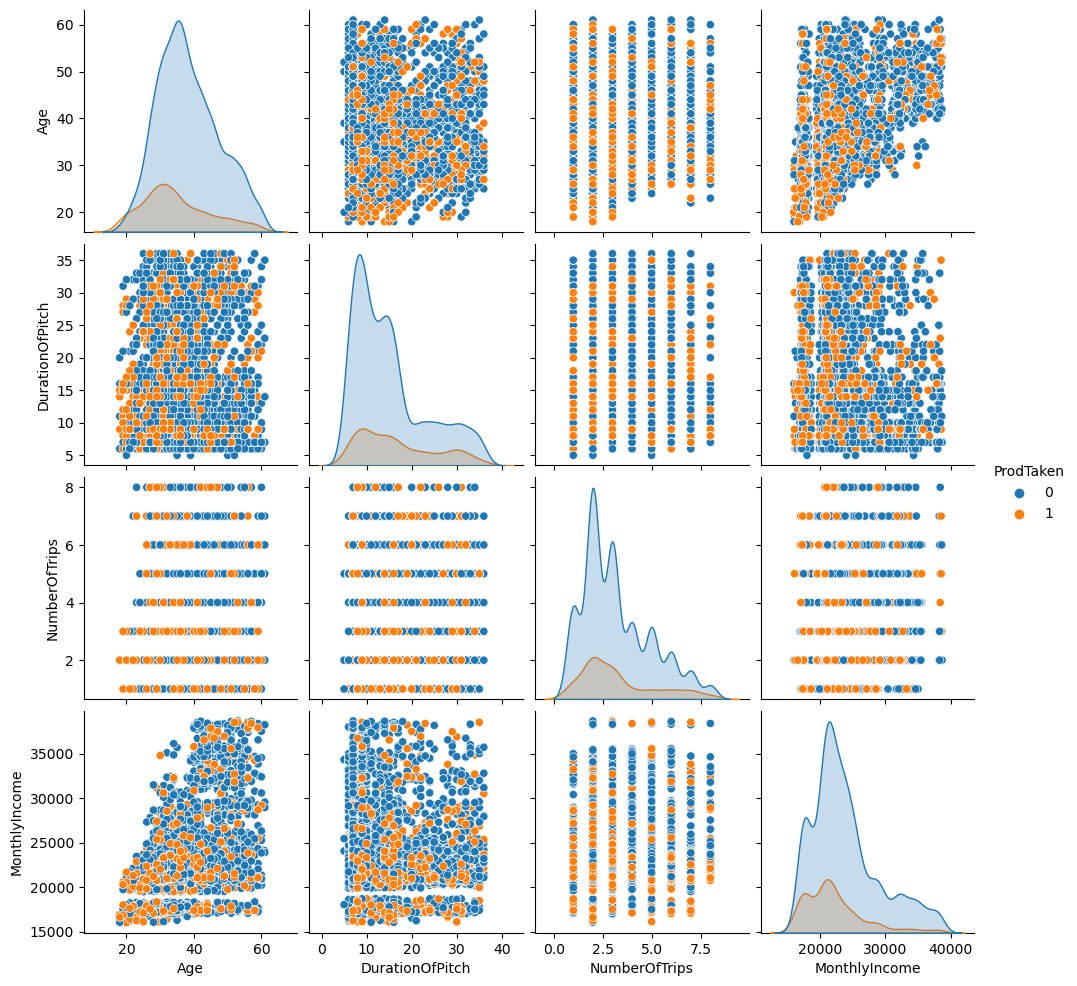

In [37]:
sns.pairplot(data=data,hue='ProdTaken')

In [38]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Prod Taken vs Number of Person Visiting

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3960  918  4878
3                       1938  459  2397
2                       1148  266  1414
4                        832  193  1025
1                         39    0    39
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


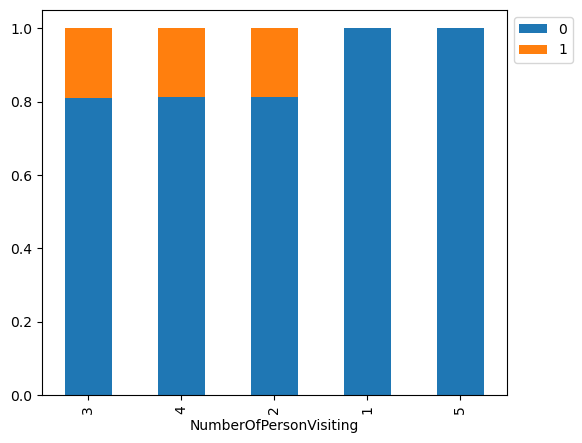

In [39]:
stacked_barplot(data, "NumberOfPersonVisiting", "ProdTaken" )

### Prod Taken vs Number of Follow ups

ProdTaken             0    1   All
NumberOfFollowups                 
All                3923  910  4833
4.0                1685  378  2063
3.0                1219  243  1462
5.0                 576  191   767
6.0                  82   54   136
2.0                 205   24   229
1.0                 156   20   176
------------------------------------------------------------------------------------------------------------------------


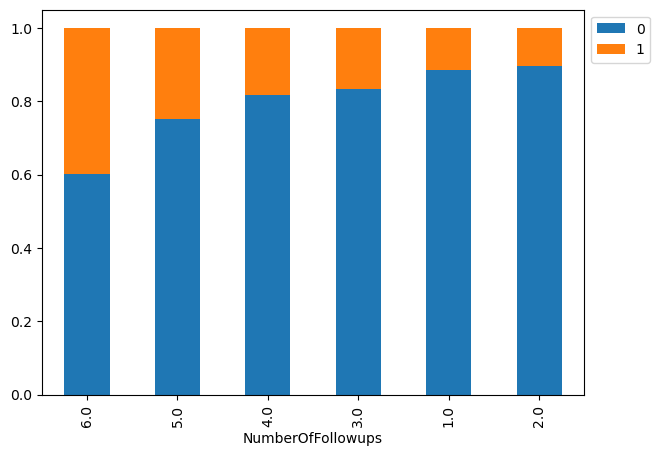

In [40]:
stacked_barplot(data, "NumberOfFollowups", "ProdTaken" )

### Prod Taken vs Occupation

ProdTaken          0    1   All
Occupation                     
All             3960  918  4878
Salaried        1948  414  2362
Small Business  1700  384  2084
Large Business   312  118   430
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


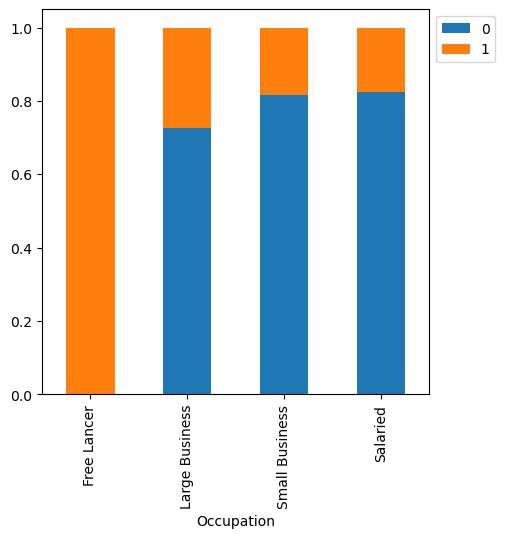

In [41]:
stacked_barplot(data, "Occupation", "ProdTaken" )

### Prod Taken vs Marital Status

ProdTaken         0    1   All
MaritalStatus                 
All            3960  918  4878
Married        2012  326  2338
Single          610  302   912
Unmarried       514  166   680
Divorced        824  124   948
------------------------------------------------------------------------------------------------------------------------


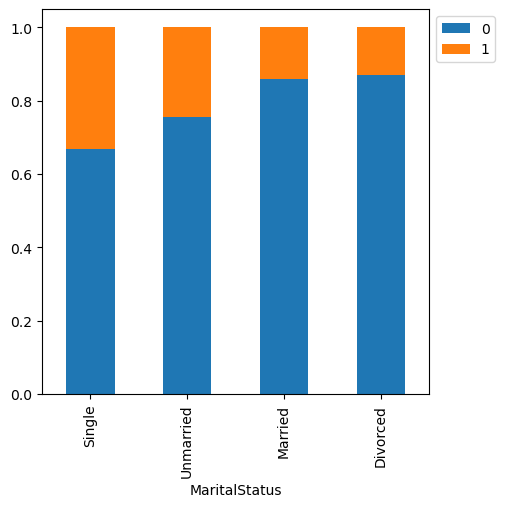

In [42]:
stacked_barplot(data, "MaritalStatus", "ProdTaken" )

### Prod Taken vs Passport

ProdTaken     0    1   All
Passport                  
All        3960  918  4878
1           924  492  1416
0          3036  426  3462
------------------------------------------------------------------------------------------------------------------------


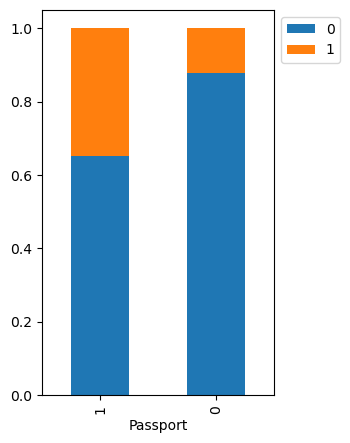

In [43]:
stacked_barplot(data, "Passport", "ProdTaken" )

### Prod Taken vs Product Pitched

ProdTaken          0    1   All
ProductPitched                 
All             3960  918  4878
Basic           1286  550  1836
Deluxe          1524  204  1728
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


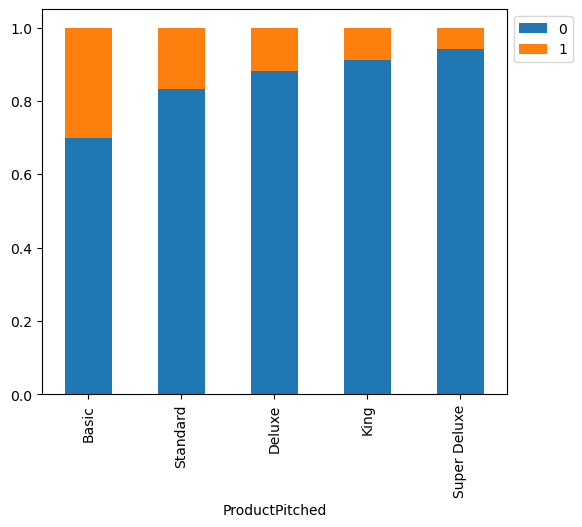

In [44]:
stacked_barplot(data, "ProductPitched", "ProdTaken" )

### Prod Taken vs Designation

ProdTaken          0    1   All
Designation                    
All             3960  918  4878
Executive       1286  550  1836
Manager         1524  204  1728
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


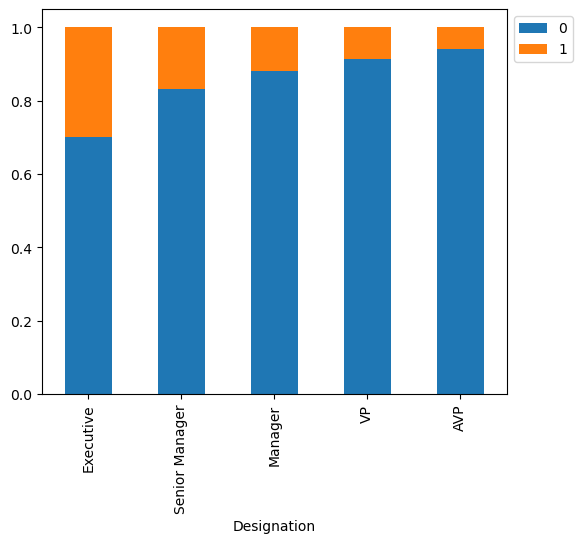

In [45]:
stacked_barplot(data, "Designation", "ProdTaken" )

### Prod Taken vs Duration of Pitch

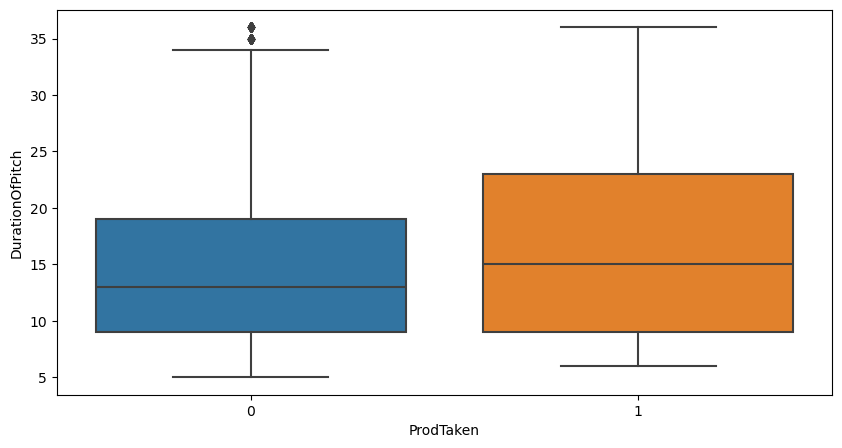

In [46]:
plt.figure(figsize=(10,5))
sns.boxplot(y='DurationOfPitch',x='ProdTaken',data=data)
plt.show()

### Prod Taken vs Monthly Income

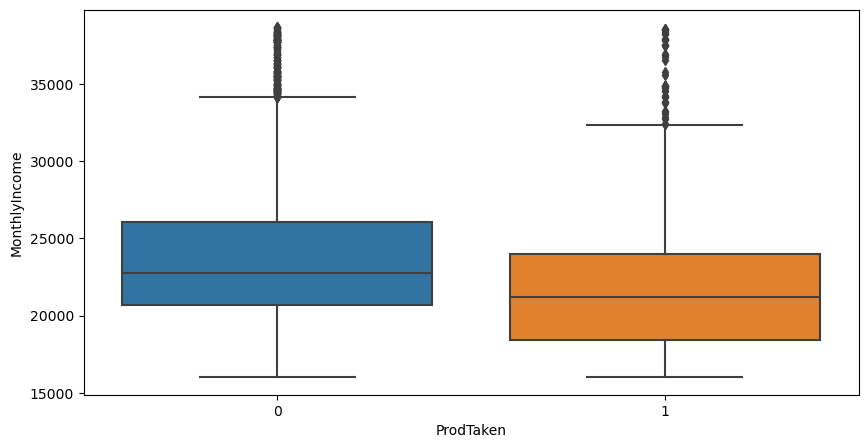

In [47]:
plt.figure(figsize=(10,5))
sns.boxplot(y='MonthlyIncome',x='ProdTaken',data=data)
plt.show()

### Prod Taken vs Monthly Income vs Designation

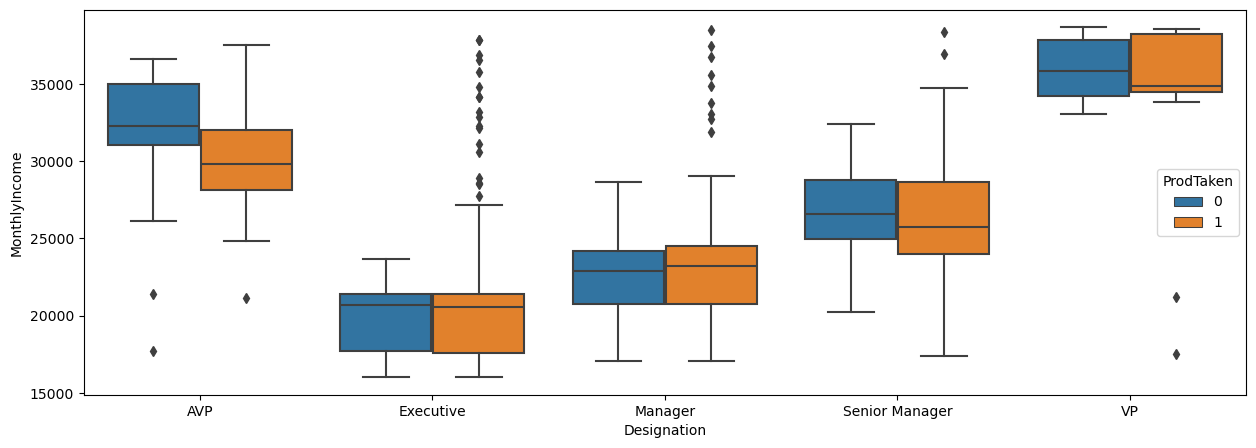

In [48]:
plt.figure(figsize=(15,5))
sns.boxplot(y='MonthlyIncome',x='Designation',hue='ProdTaken',data=data)
plt.show()

### Prod Taken vs Age

<Axes: xlabel='Age', ylabel='ProdTaken'>

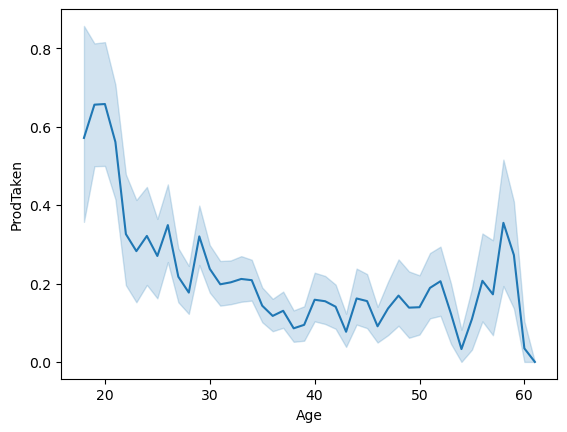

In [49]:
sns.lineplot(x='Age',y='ProdTaken',data=data)

### Grouping data w.r.t to packages to build customer profiles

In [50]:
data[(data['ProductPitched']=='Basic') & (data['ProdTaken']==1)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,550.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,513.0,NaN,NaN,NaN,31.292398,9.08834,18.0,25.0,30.0,35.0,59.0
TypeofContact,547,2,Self Enquiry,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,550.0,3.0,1.0,390.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,530.0,NaN,NaN,NaN,15.811321,7.91509,6.0,9.0,14.0,22.0,36.0
Occupation,550,4,Salaried,260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,550,2,Male,342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,550.0,3.0,3.0,275.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,546.0,6.0,4.0,234.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductPitched,550,1,Basic,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observations

1. **Target Variable (ProdTaken)**:
   - It seems that all values in `ProdTaken` are `1`, meaning this column lacks variability, which could make it challenging to use as a target variable for any predictive modeling.

2. **Numerical Features**:
   - **Age**: Average of 31.29 years, ranging from 18 to 59.
   - **DurationOfPitch**: Average duration is around 15.8, with a range from 6 to 36.
   - **MonthlyIncome**: Average income is 20,165 with a large standard deviation of 33,117, indicating high income variability, ranging from 16,009 to 37,868.
   - **NumberOfTrips**: The average is 3.17, with values up to 8, indicating moderate variability.
   
3. **Categorical Features**:
   - **TypeofContact**: "Self Enquiry" is the most common type of contact, with a frequency of 355 out of 547 entries.
   - **Occupation**: "Salaried" is the top occupation, with 260 occurrences.
   - **Gender**: Majority are Male (342 out of 550).
   - **ProductPitched**: Only one unique value ("Basic") is present in all entries, indicating no variation.
   - **MaritalStatus**: "Single" is the most common marital status.
   - **Designation**: Only one unique designation ("Executive"), indicating no variation.
   
4. **Binary Features**:
   - **Passport**: Binary, with the top value being 1 (320 occurrences).
   - **OwnCar**: Binary, with the top value also being 1 (314 occurrences).

5. **Features with Missing Values**:
   - Several columns have less than 550 counts, indicating missing values. Notable columns include `Age`, `TypeofContact`, `DurationOfPitch`, `NumberOfFollowups`, and `MonthlyIncome`.

### Key Insights

- **Imbalanced Features**: Features like `ProductPitched` and `Designation` have no variability, which may limit their usefulness in analysis.
- **Potential Issues with Target Variable**: Since `ProdTaken` has no variation, it might not serve as a usable target for predictive analysis. A different target variable may be necessary.
- **High Variability in Monthly Income**: This could indicate a wide economic diversity in the population, which might impact other factors, like the frequency of trips or satisfaction scores.


In [51]:
data[(data['ProductPitched']=='Super Deluxe') & (data['ProdTaken']==1)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,20.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,20.0,NaN,NaN,NaN,43.5,4.83953,39.0,40.0,42.0,45.25,56.0
TypeofContact,20,2,Company Invited,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,20.0,2.0,3.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,20.0,NaN,NaN,NaN,18.5,7.330542,8.0,15.0,18.5,20.0,31.0
Occupation,20,2,Salaried,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,20,2,Male,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,20.0,3.0,3.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,20.0,6.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductPitched,20,1,Super Deluxe,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observations

1. **ProdTaken**:
   - Similar to previous summaries, all values are `1`, meaning no variation.

2. **Numerical Features**:
   - **Age**: Mean age is 43.5 with a small range (39–56).
   - **DurationOfPitch**: Mean duration is 18.5, with values ranging from 8 to 31, suggesting moderate variability.
   - **MonthlyIncome**: Mean income is around 29,823, with a notable range from 21,151 to 37,502. This continues to show income variability but with a smaller spread compared to the full dataset.
   - **NumberOfTrips**: Mean value is approximately 3.26, with values up to 8, indicating moderate trip frequency.

3. **Categorical Features**:
   - **TypeofContact**: Primarily “Company Invited” (16 out of 20).
   - **Occupation**: Majority are "Salaried" (16 out of 20).
   - **Gender**: Predominantly Male (16 out of 20).
   - **ProductPitched**: Only one unique value, "Super Deluxe," indicating no variation.
   - **MaritalStatus**: Mostly “Single” (10 out of 20).

4. **Binary Features**:
   - **Passport** and **OwnCar**: Binary features, mostly with a top value of 1 (12 out of 20 and 10 out of 20, respectively).

5. **Unique and Non-Variable Features**:
   - **ProductPitched** and **Designation** have only one unique value across these 20 entries, making them non-informative in this subset.

### Key Insights

- **Lack of Variation in Target and Certain Features**: The `ProdTaken` and `ProductPitched` features lack variability, limiting their usefulness in predictive modeling or analysis.
- **Small Range in Age and MonthlyIncome**: This subset shows a narrower range in age and monthly income compared to the overall dataset, which may affect generalizability.
- **Predominance of Certain Categories**: Features like `TypeofContact`, `Occupation`, and `Gender` are dominated by specific categories, which may affect the analysis if these trends continue in larger samples.

 

In [52]:
data[(data['ProductPitched']=='King') & (data['ProdTaken']==1)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,20.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,20.0,NaN,NaN,NaN,48.9,9.618513,27.0,42.0,52.5,56.0,59.0
TypeofContact,20,1,Self Enquiry,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,20.0,2.0,1.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,20.0,NaN,NaN,NaN,10.5,4.135851,8.0,8.0,9.0,9.0,19.0
Occupation,20,3,Small Business,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,20,2,Female,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,20.0,3.0,3.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,20.0,4.0,3.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductPitched,20,1,King,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observations

1. **Target Variable (ProdTaken)**:
   - All values for `ProdTaken` are `1`, indicating no variation. This limits its use as a target for any predictive analysis.

2. **Numerical Features**:
   - **Age**: Mean age is approximately 48.9, with a range from 27 to 59, showing a broad age distribution.
   - **DurationOfPitch**: Mean pitch duration is 10.5, with values between 8 and 19, indicating some variability.
   - **MonthlyIncome**: Mean income is around 34,672, with a significant standard deviation of 5,577, ranging from 17,517 to 38,537, suggesting moderate income diversity.
   - **NumberOfTrips**: Mean value is approximately 3.41, with values up to 7, indicating variability in travel frequency.

3. **Categorical Features**:
   - **TypeofContact**: Most entries are “Self Enquiry” (20 out of 20), suggesting this is a prominent contact method.
   - **Occupation**: "Small Business" is the most common occupation, with 12 occurrences.
   - **Gender**: Predominantly Female (12 out of 20).
   - **ProductPitched**: Only one unique value, "King," indicating no variation.
   - **MaritalStatus**: Mostly “Single” (8 out of 20).

4. **Binary Features**:
   - **Passport** and **OwnCar**: Both are binary, with the most common value being 1 (12 out of 20 and 18 out of 20, respectively).

5. **Features with Missing Values**:
   - Not all columns have complete data. For example, `NumberOfTrips` has 17 entries, while `PreferredPropertyStar` and `NumberOfChildrenVisiting` have 16, indicating missing values.

6. **Unique and Non-Variable Features**:
   - **ProductPitched** and **Designation** both have only one unique value in this subset, limiting their usefulness in any analysis.

### Key Insights

- **Lack of Variation**: Like previous summaries, several features lack variability, which could make analysis difficult. `ProdTaken` continues to have only one unique value, making it unsuitable as a target variable.
- **High Income and Age Variation**: The wide range in both `Age` and `MonthlyIncome` suggests diversity in the dataset's demographics, which could influence other factors like `PitchSatisfactionScore` or `NumberOfTrips`.
- **Categorical Dominance**: Features like `TypeofContact`, `Occupation`, and `Gender` are heavily skewed toward specific values, which may not reflect the full range of potential responses.
 

### Correlation Heatmap

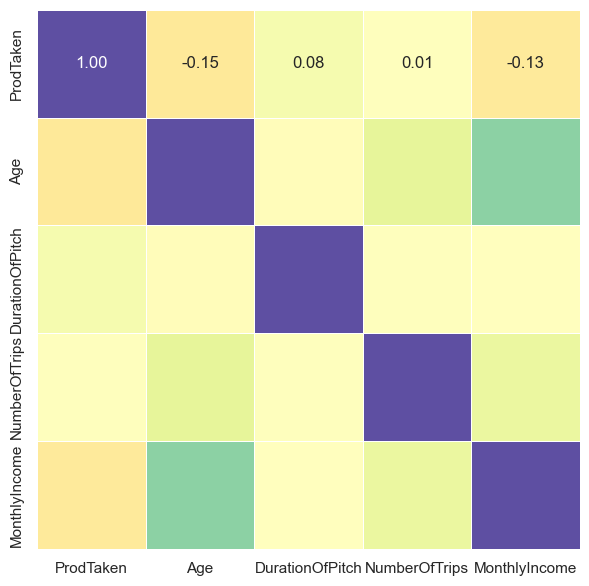

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap with numerical data
sns.set(rc={'figure.figsize':(7,7)})
sns.heatmap(numerical_data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="Spectral",
            fmt='0.2f')
plt.show()


1. **ProdTaken**:
   - It has a weak negative correlation with `Age` (-0.15) and `MonthlyIncome` (-0.13), and a very slight positive correlation with `DurationOfPitch` (0.08) and `NumberOfTrips` (0.01).
   - Since all correlations with `ProdTaken` are close to zero, this suggests that none of these features have a strong linear relationship with `ProdTaken`.

2. **Age and MonthlyIncome**:
   - There’s no strong correlation between `Age` and `MonthlyIncome` (correlation near zero), suggesting that income levels are not closely tied to age within this dataset.

3. **DurationOfPitch and NumberOfTrips**:
   - There’s no significant correlation between these features, which suggests that the length of the pitch does not correlate with the number of trips.

 

### Split the dataset into train and test sets

In [54]:
X=data.drop(columns='ProdTaken')
Y=data['ProdTaken']

To predict customers who are more likely to buy the product, we should remove the columns 'DurationOfPitch', 'NumberOfFollowups', 'ProductPitched', and 'PitchSatisfactionScore' since these features would not be available when making predictions on new data.

In [55]:
X.drop(columns=['DurationOfPitch','NumberOfFollowups','ProductPitched','PitchSatisfactionScore'],inplace=True)

In [56]:
#Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1,stratify=Y)

In [57]:
si1=SimpleImputer(strategy='median')

median_imputed_col=['Age','MonthlyIncome','NumberOfTrips']

#Fit and transform the train data
X_train[median_imputed_col]=si1.fit_transform(X_train[median_imputed_col])

#Transform the test data i.e. replace missing values with the median calculated using training data
X_test[median_imputed_col]=si1.transform(X_test[median_imputed_col])

In [58]:
si2=SimpleImputer(strategy='most_frequent')

mode_imputed_col=['TypeofContact','PreferredPropertyStar','NumberOfChildrenVisiting']

#Fit and transform the train data
X_train[mode_imputed_col]=si2.fit_transform(X_train[mode_imputed_col])

#Transform the test data i.e. replace missing values with the mode calculated using training data
X_test[mode_imputed_col]=si2.transform(X_test[mode_imputed_col])

In [59]:
#Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Age                         0
TypeofContact               0
CityTier                    0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64
------------------------------
Age                         0
TypeofContact               0
CityTier                    0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64


### Let's create dummy variables for string type variables and convert other column types back to float.

In [60]:
#converting data types of columns to float
for column in ['NumberOfPersonVisiting', 'Passport', 'OwnCar']:
    X_train[column]=X_train[column].astype('float')
    X_test[column]=X_test[column].astype('float')

In [61]:
#List of columns to create a dummy variables
col_dummy=['TypeofContact', 'Occupation', 'Gender', 'MaritalStatus', 'Designation', 'CityTier']

In [62]:
#Encoding categorical varaibles
X_train=pd.get_dummies(X_train, columns=col_dummy, drop_first=True)
X_test=pd.get_dummies(X_test, columns=col_dummy, drop_first=True)

### Let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.

In [63]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [64]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.871585  0.641304   0.665414  0.653137


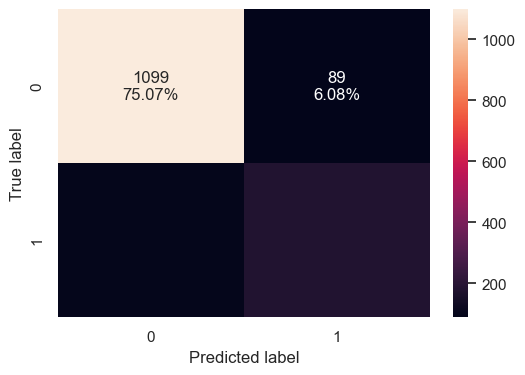

In [65]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree, X_train,y_train)
print("Training performance:\n", d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree, X_test,y_test)
print("Testing performance:\n", d_tree_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

The model performs perfectly on the training set, suggesting that it might be overfitting.

### Cost Complexity Pruning

In [66]:
path = d_tree.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [67]:
clfs_list = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs_list.append(clf)

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs_list[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.019282372972987682


In [68]:
#Fitting model for each value of alpha and saving the train recall in a list 
recall_train=[]
for clf in clfs_list:
    pred_train=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train)
    recall_train.append(values_train)

In [69]:
#Fitting model for each value of alpha and saving the test recall in a list
recall_test=[]
for clf in clfs_list:
    pred_test=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test)
    recall_test.append(values_test)

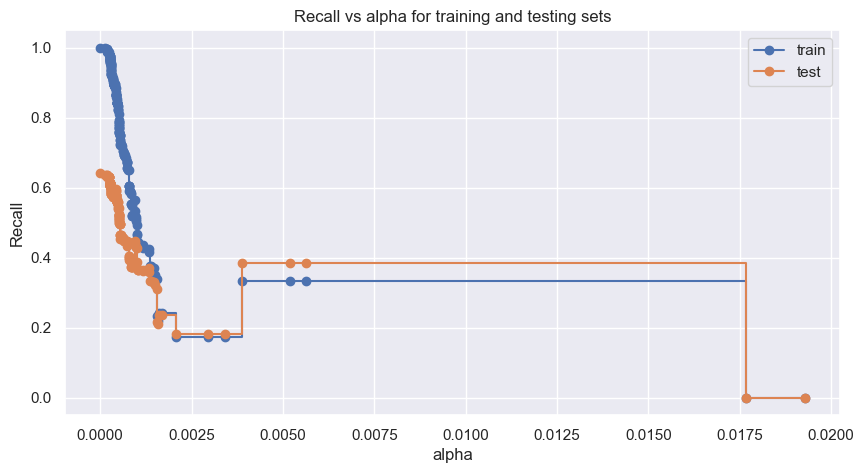

In [70]:
#Plotting the graph for Recall VS alpha 
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.871585  0.641304   0.665414  0.653137


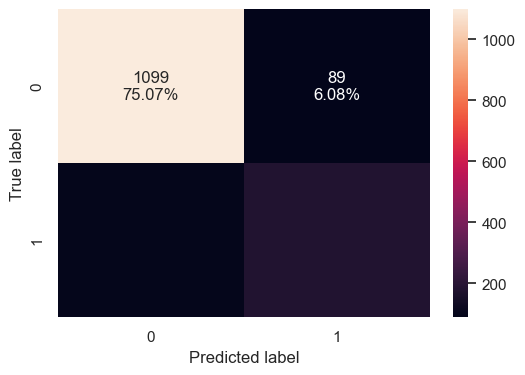

In [71]:
#Creating the model where we get highest test recall
index_best_pruned_model = np.argmax(recall_test)

pruned_dtree_model = clfs_list[index_best_pruned_model]

#Calculating different metrics
pruned_dtree_model_train_perf=model_performance_classification_sklearn(pruned_dtree_model, X_train,y_train)
print("Training performance:\n", pruned_dtree_model_train_perf)
pruned_dtree_model_test_perf=model_performance_classification_sklearn(pruned_dtree_model, X_test,y_test)
print("Testing performance:\n", pruned_dtree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(pruned_dtree_model,X_test,y_test)

There is no improvement in the model performance as the best-pruned model fitted is the same as we built initially.

### Hyperparameter Tuning

In [72]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.18,1:0.72},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.72}, max_depth=5,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       min_samples_leaf=10, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.803456  0.663551   0.483541  0.559422
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.777322  0.652174   0.439024  0.524781


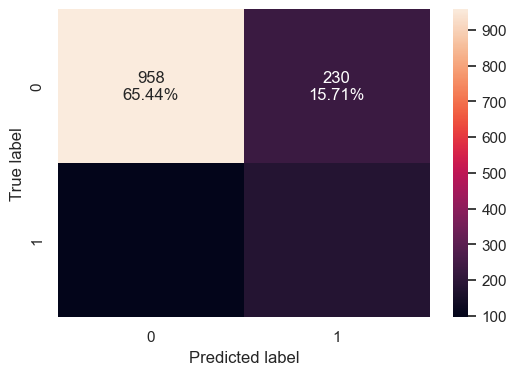

In [73]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train,y_train)
print("Training performance:\n", dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test,y_test)
print("Testing performance:\n", dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

The model is generalizing well and does not appear to be overfitting. The recall remains similar on the test data, but there is a significant drop in precision.

### Random Forest Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.894126  0.51087   0.875776  0.645309


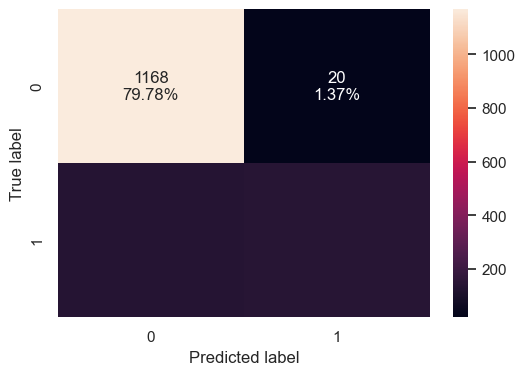

In [74]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

With the default parameters, the random forest model outperforms the decision tree in terms of precision but has a lower recall. The model is currently overfitting the training data. We’ll address this by tuning hyperparameters to reduce overfitting and improve recall.

### Hyperparameter Tuning

In [75]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring='recall',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_depth=15,
                       max_features=None, min_samples_leaf=11, n_estimators=60,
                       oob_score=True, random_state=1)

Training performance:
    Accuracy   Recall  Precision       F1
0   0.89133  0.88162   0.657375  0.75316
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.814891  0.663043   0.506925  0.574568


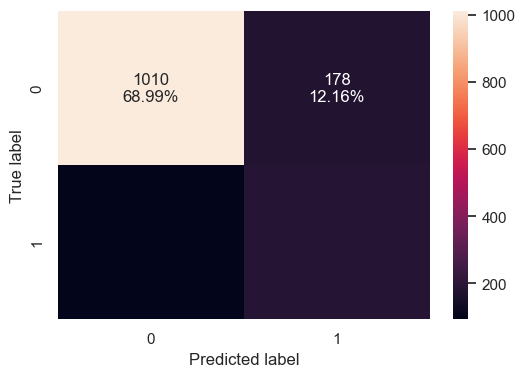

In [76]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned, X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned, X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

The overfitting has been reduced after tuning the model.
The recall has improved on the test data but the precision has decreased significantly.

### Bagging Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.990334  0.951713   0.996737  0.973705
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.886612  0.51087   0.819767  0.629464


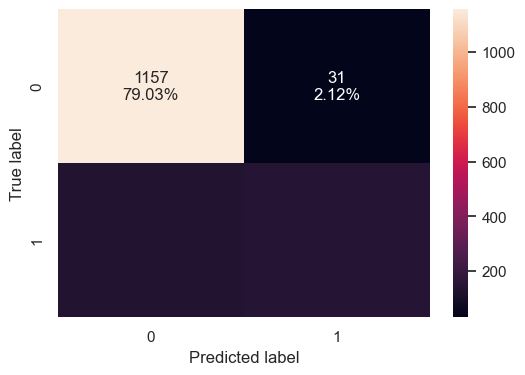

In [77]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier, X_train,y_train)
print("Training performance:\n",bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier, X_test,y_test)
print("Testing performance:\n",bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

With default parameters, the bagging classifier is performing well in terms of precision but has less recall.
The model is overfitting the training data.
We'll try to reduce overfitting and improve recall by hyperparameter tuning.

### Hyperparameter Tuning

In [78]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999121  0.995327        1.0  0.997658
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.900956  0.554348   0.874286  0.678492


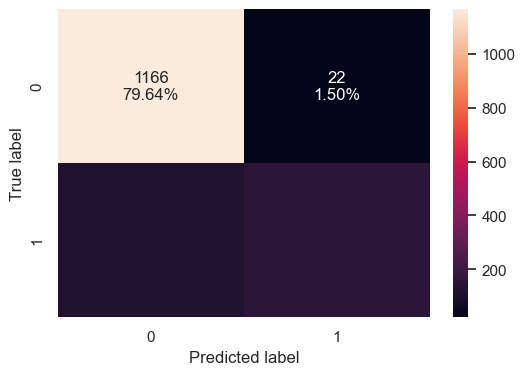

In [91]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned, X_train,y_train)
print("Training performance:\n",bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned, X_test,y_test)
print("Testing performance:\n",bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

The test recall and test precision have improved but the model is still overfitting the training data.
The recall is still very low.

### Gradient Boosting Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.878735  0.433022   0.847561  0.573196
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.861339  0.373188   0.774436  0.503667


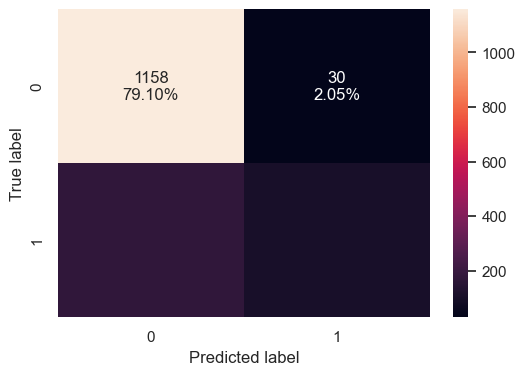

In [82]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier, X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier, X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

The model is slightly overfitting the training data in terms of recall and precision but is giving very low recall on training and test data.
The recall is better as compared to AdaBoost with default parameters but still not great.

### Hyperparameter Tuning

In [83]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=250, random_state=1,
                           subsample=0.8)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.911541  0.590343   0.906699  0.715094
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.866803  0.442029   0.748466  0.555809


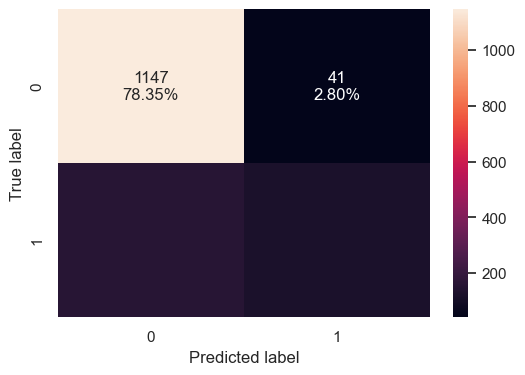

In [87]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned, X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned, X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

The model performance has improved slightly after hyperparameter tuning but the model is still overfitting the training data.
The test precision has decreased slightly and the test recall has increased slightly but still very low.

### Comparing all models

In [92]:
# training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,pruned_dtree_model_train_perf.T, dtree_estimator_model_train_perf.T, rf_estimator_model_train_perf.T,
    rf_tuned_model_train_perf.T,bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T ,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Prunned Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
     "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",]
     
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Prunned Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned
Accuracy,1.0,1.0,0.803456,1.0,0.891330,0.990334,0.999121,0.878735,0.911541
Recall,1.0,1.0,0.663551,1.0,0.881620,0.951713,0.995327,0.433022,0.590343
Precision,1.0,1.0,0.483541,1.0,0.657375,0.996737,1.000000,0.847561,0.906699
F1,1.0,1.0,0.559422,1.0,0.753160,0.973705,0.997658,0.573196,0.715094


In [93]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,pruned_dtree_model_test_perf.T, dtree_estimator_model_test_perf.T, rf_estimator_model_test_perf.T,
    rf_tuned_model_test_perf.T,bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Prunned Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
     "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned"]
print("Testing performance comparison:")
models_test_comp_df




# Testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,pruned_dtree_model_test_perf.T, dtree_estimator_model_test_perf.T, rf_estimator_model_test_perf.T,
    rf_tuned_model_test_perf.T,bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
     xgb_tuned_model_test_perf.T, stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Prunned Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adaboost Classifier Tuned",
     "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
     "XGBoost Classifier",
    "XGBoost Classifier Tuned","Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Prunned Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned
Accuracy,0.871585,0.871585,0.777322,0.894126,0.814891,0.886612,0.900956,0.861339,0.866803
Recall,0.641304,0.641304,0.652174,0.510870,0.663043,0.510870,0.554348,0.373188,0.442029
Precision,0.665414,0.665414,0.439024,0.875776,0.506925,0.819767,0.874286,0.774436,0.748466
F1,0.653137,0.653137,0.524781,0.645309,0.574568,0.629464,0.678492,0.503667,0.555809



1. **Accuracy**:
   - The `Bagging Estimator Tuned` has the highest accuracy (0.900956), closely followed by the `Bagging Classifier` (0.886612) and `Random Forest Estimator` (0.894126).
   - If accuracy is the primary metric, the `Bagging Estimator Tuned` is the top performer.

2. **Recall**:
   - The `Random Forest Tuned` has the highest recall (0.663043), which indicates it captures positive cases effectively.
   - If your application is sensitive to false negatives and needs high recall, `Random Forest Tuned` would be preferable.

3. **Precision**:
   - The `Random Forest Estimator` exhibits the highest precision (0.875776), which is beneficial if minimizing false positives is crucial.
   - This could be suitable in cases where precision is a priority.

4. **F1 Score**:
   - The `Bagging Estimator Tuned` shows the highest F1 score (0.678492), balancing both precision and recall well.
   - This model would be a good choice if you need a balance between precision and recall.

### Summary Recommendations
- **Best Overall Performance**: `Bagging Estimator Tuned` has high scores across all metrics, making it a strong all-around model.
- **High Recall**: `Random Forest Tuned` if recall is more critical.
- **High Precision**: `Random Forest Estimator` if precision is a priority.


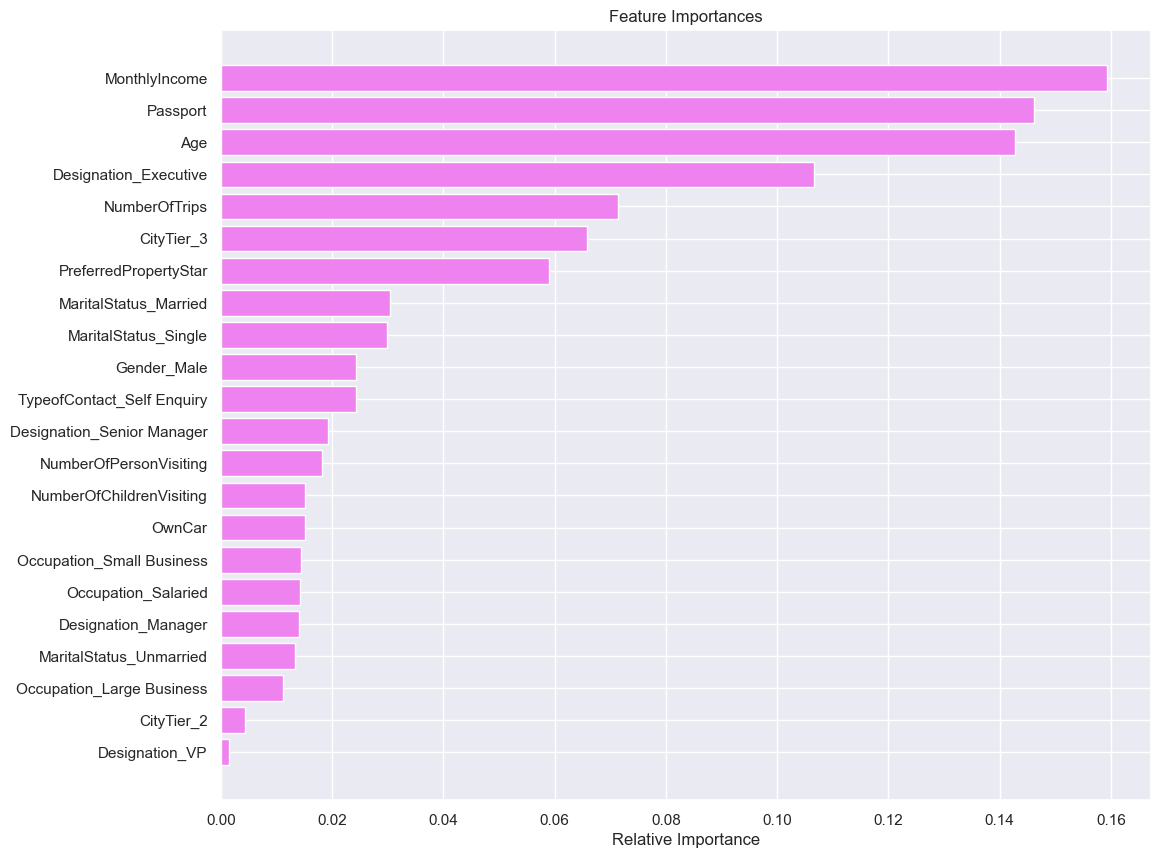

In [105]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Key Insights

1. **Monthly Income**:
   - Monthly income is the most significant predictor. Customers with higher incomes may have more discretionary funds available, making them more likely to invest in travel packages.

2. **Passport**:
   - Having a passport is a crucial factor, likely because customers with passports are already prepared for international travel, indicating a higher probability of purchasing a travel package.

3. **Age**:
   - Age is an important factor, suggesting that specific age groups may be more inclined to buy travel packages. This could relate to lifestyle and travel preferences associated with certain life stages.

4. **Designation**:
   - Executive and Senior Manager designations have notable importance, possibly indicating that individuals in higher corporate roles are more likely to purchase travel packages, potentially due to greater financial stability or vacation allowances.

5. **Number of Trips**:
   - The frequency of previous trips is a significant indicator, as customers who have traveled frequently are more likely to purchase additional travel packages.

6. **City Tier**:
   - Customers from certain city tiers, such as `CityTier_3`, show higher importance, possibly due to differing levels of disposable income and lifestyle preferences in different city tiers.

7. **Marital Status**:
   - Marital status (Married, Single) is relevant, potentially indicating that marital status correlates with travel behavior and likelihood to invest in travel.


### Business Recommendations

To maximize the effectiveness of marketing strategies for the new travel package, the company should focus efforts on high-income customers, as they are more likely to make a purchase. Personalized offers or premium packages could especially appeal to this demographic. Additionally, target customers who already hold passports through tailored email campaigns or special offers, as they are more prepared and inclined to travel. Age-based customization can further enhance appeal, with adventure packages for younger travelers and luxury or relaxation options for older customers. Corporate targeting is another opportunity, where discounts or tailored packages for executives and senior managers could increase engagement. Partnering with companies to offer travel incentives for employees may also drive interest. Frequent travelers would benefit from loyalty programs or discounts, encouraging repeat purchases through incentives for multiple bookings or referral rewards. Regional promotions based on city tiers can also be effective, with budget-friendly options for certain areas and luxury packages for more affluent regions. Finally, consider marital status-specific offers, such as group tours for single travelers or romantic getaway packages for married couples, to align with distinct travel preferences across demographics.